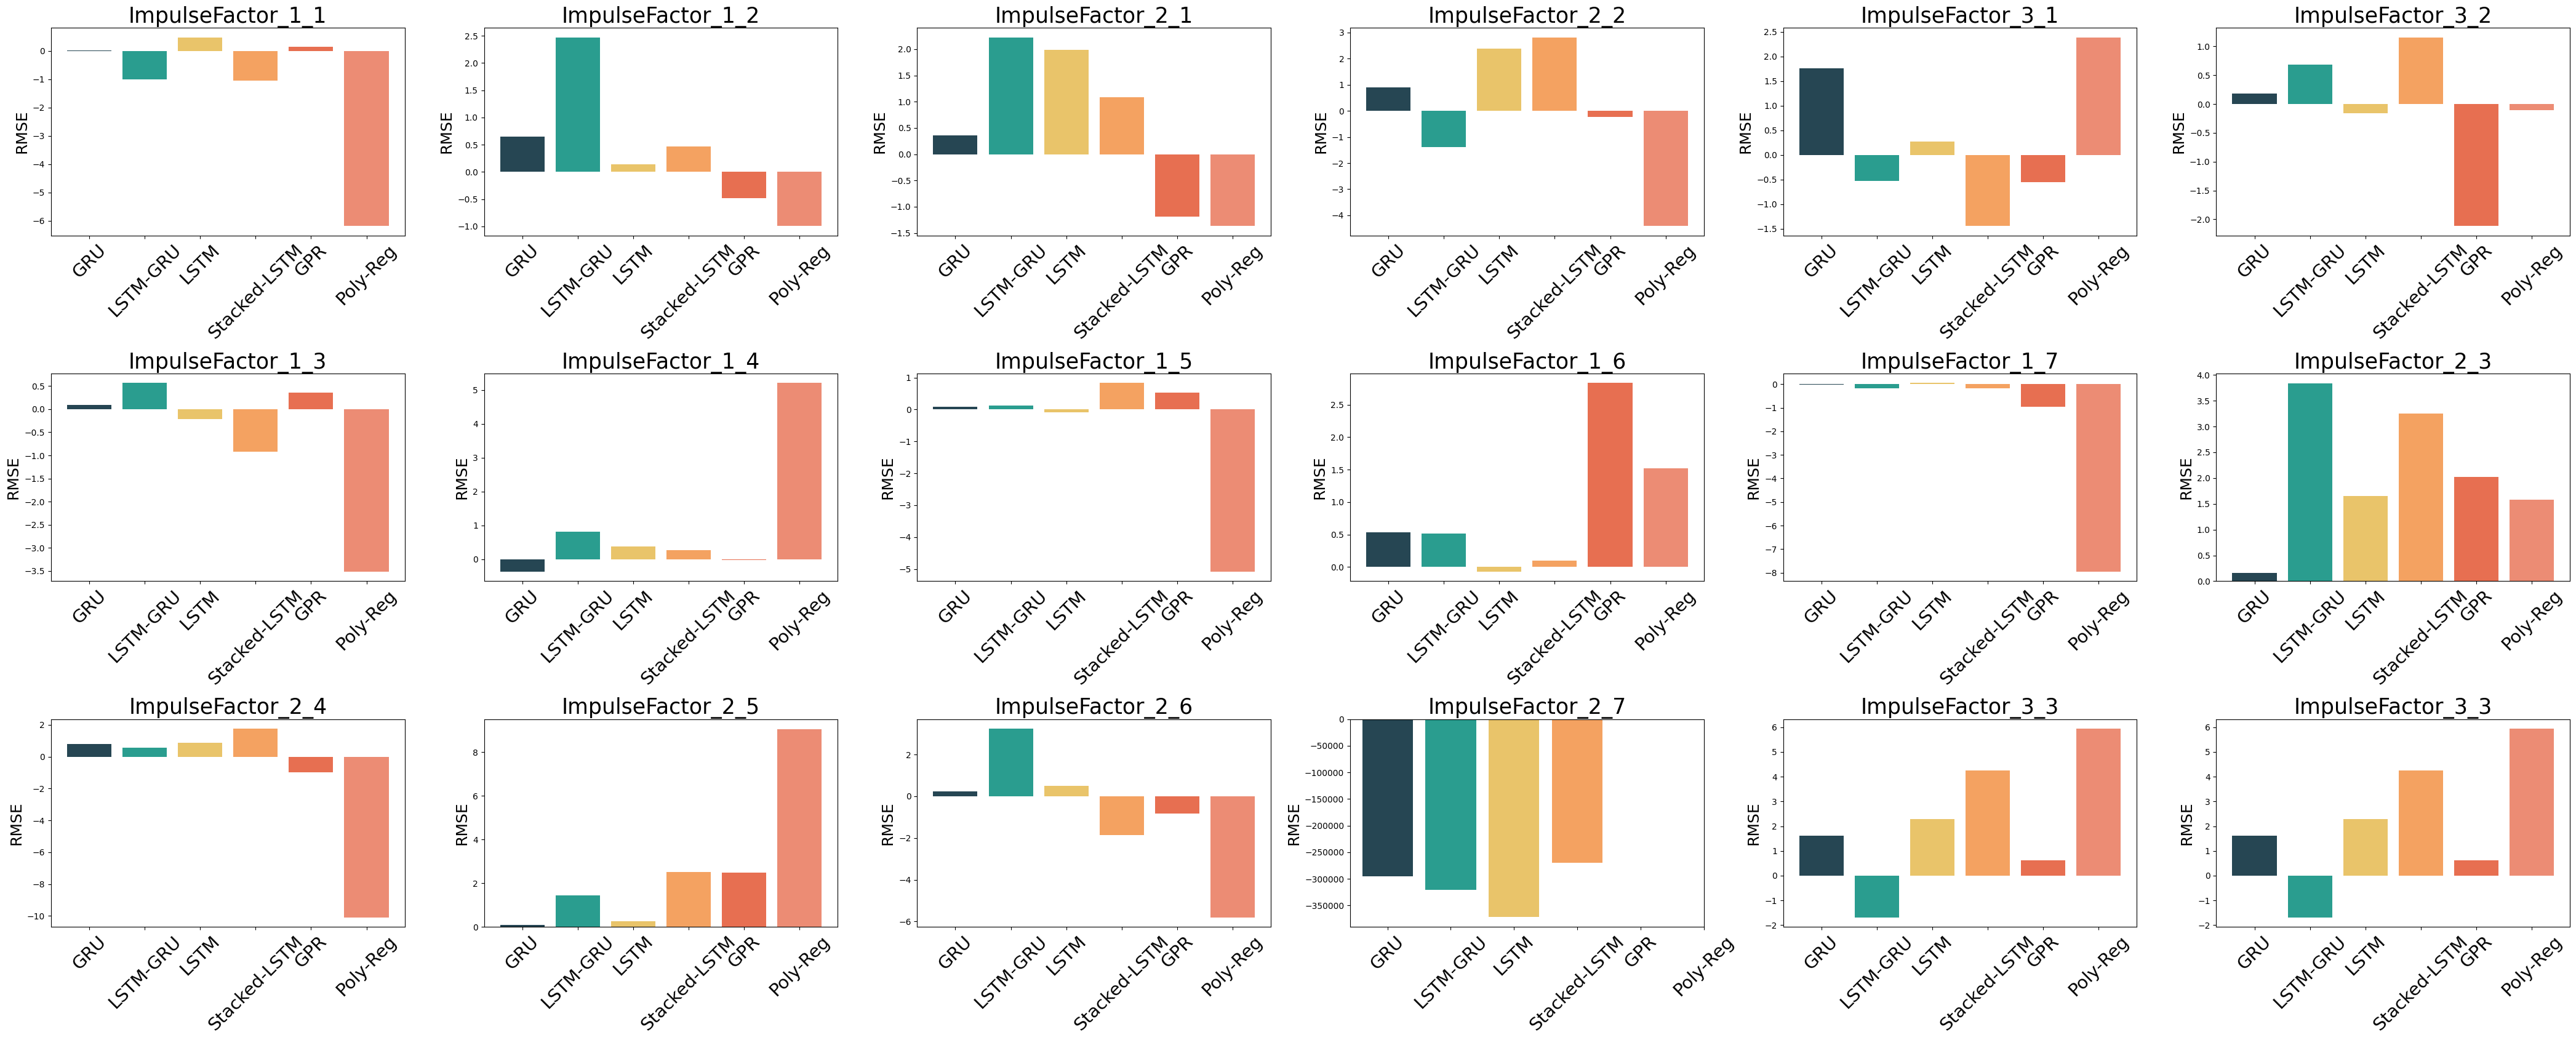

In [143]:
import json
import matplotlib.pyplot as plt

# Load JSON data for each model
Poly_Reg_Logistic_dat = None
with open("./Performance_Dump/SASD RUL - Pronostia Dataset/Poly_Reg_Logistic.json") as json_file:
    Poly_Reg_Logistic_dat = json.load(json_file)

GPR_dat = None
with open("./Performance_Dump/SASD RUL - Pronostia Dataset/GPR_Logistic.json") as json_file:
    GPR_dat = json.load(json_file)

LSTM_dat = None
with open("./Performance_Dump/SASD RUL - Pronostia Dataset/LSTM.json") as json_file:
    LSTM_dat = json.load(json_file)

Stacked_LSTM_dat = None
with open("./Performance_Dump/SASD RUL - Pronostia Dataset/Stacked_LSTM.json") as json_file:
    Stacked_LSTM_dat = json.load(json_file)

GRU_dat = None
with open("./Performance_Dump/SASD RUL - Pronostia Dataset/GRU.json") as json_file:
    GRU_dat = json.load(json_file)

LSTM_GRU_dat = None
with open("./Performance_Dump/SASD RUL - Pronostia Dataset/LSTM_GRU.json") as json_file:
    LSTM_GRU_dat = json.load(json_file)

# Function to get the max/min metric score across data splits
def getMetricScore(source: list, score: str, method: str = 'max'):
    """
    source: list containing performance data
    score: the metric to consider ('R2', 'MAE', etc.)
    method: 'max' to return maximum value, 'min' to return minimum value
    """

    def getMin(numbers):
        return min(numbers, key=abs)
    
    def getMax(numbers):
        return max(numbers, key=abs)
    
    dat = []
    for x in source:
        splits = list(x.values())[0]  # Retrieve the dictionary for each bearing
        values = [split[score] for split in splits]  # Get the values for different splits
        if method == 'max':
            dat.append(getMax(values))
        elif method == 'min':
            dat.append(getMin(values))
        elif method == 'avg':
            dat.append(np.mean(values))
    return dat

import numpy as np

# Prepare bearing IDs and configuration
bearing_ids = [x for x in [list(y.keys())[0] for y in LSTM_dat]]
# bearing_ids = sorted(bearing_ids)
config = "pro_error"  # Metric to evaluate ('R2', 'MAE', etc.)
method = 'min'  # Select 'max' or 'min' to plot the best metric across splits

# Get R2 for 25% training split (max/min across splits)
r2_best_perc = {
    'GRU': getMetricScore(GRU_dat, config, method),
    'LSTM-GRU': getMetricScore(LSTM_GRU_dat, config, method),
    'LSTM': getMetricScore(LSTM_dat, config, method),
    'Stacked-LSTM': getMetricScore(Stacked_LSTM_dat, config, method),
    'GPR_Logistic': getMetricScore(GPR_dat, config, method),
    'Poly-Reg_Logistic': getMetricScore(Poly_Reg_Logistic_dat, config, method),
}

# Plot the results
fig, axes = plt.subplots(3, 6, figsize=(42, 1 * len(bearing_ids)))

min_val, max_val = min(np.array([i for i in r2_best_perc.values()]).flatten()), max(np.array([i for i in r2_best_perc.values()]).flatten())

for i in range(6):
    for j in range(3):
        ax = axes[j, i]
        index = min((j * 6) + i, len(bearing_ids) - 1)
        # if(bearing_ids[index].split("_")[1] != "1"): continue

        # Sort models by performance metric (R²)
        keys = list(r2_best_perc.keys())
        values = [d[index] for d in r2_best_perc.values()]
        # zipped = zip(keys, values)
        # sorted_zipped_arrays = sorted(zipped, key=lambda x: x[1], reverse=(method == 'max'))
        # keys, values = zip(*sorted_zipped_arrays)

        highest_value = round(values[0], 3)  # Round off the highest value
        bar_colors = ['black' if round(value, 3) == highest_value else 'blue' for value in values]

        custom_colors = ['#264653', '#2a9d8f', '#e9c46a', '#f4a261', '#e76f51', '#ec8c74']
        ax.bar(keys, values, color=custom_colors)
        # ax.set_ylim(min_val, max_val)
        ax.set_xticks(range(len(keys)))
        ax.set_xticklabels([x.split("_")[0] for x in keys], rotation=45, size=21)
        ax.set_title(bearing_ids[index], size=25)
        ax.set_ylabel('RMSE', size=18)


plt.tight_layout()
plt.show()


In [144]:
r2_best_perc["GPR_Logistic"]

[0.15866092969687381,
 -0.48524869992044156,
 -1.1854264564868566,
 -0.23758418068983284,
 -0.558704021289118,
 -2.117704898682669,
 0.35939099897121274,
 -0.015679686057120102,
 0.5337757561558638,
 2.8359742238730274,
 -0.947866689312673,
 2.021760973346048,
 -0.9655483821881644,
 2.4837082638957715,
 -0.8333360595368524,
 -inf,
 0.6109419326186035]

In [145]:
import pandas as pd
x = r2_best_perc
df = pd.DataFrame(x) #, index = [""]*len(x)) #.to_clipboard()
df["bearing"] = bearing_ids
# set index to bearing ID
df.set_index("bearing", inplace=True)
df.sort_values(by="bearing", inplace=True)
print(df)

                             GRU       LSTM-GRU           LSTM   Stacked-LSTM  \
bearing                                                                         
ImpulseFactor_1_1       0.014296      -1.007522       0.485627      -1.044062   
ImpulseFactor_1_2       0.649981       2.473062       0.139634       0.467594   
ImpulseFactor_1_3       0.088045       0.565954      -0.209714      -0.925604   
ImpulseFactor_1_4      -0.372601       0.806321       0.367114       0.264853   
ImpulseFactor_1_5       0.086957       0.126989      -0.095741       0.832493   
ImpulseFactor_1_6       0.529405       0.510651      -0.074940       0.100166   
ImpulseFactor_1_7      -0.016772      -0.170666       0.048525      -0.175969   
ImpulseFactor_2_1       0.356404       2.225964       1.987747       1.084021   
ImpulseFactor_2_2       0.907402      -1.378541       2.389836       2.815083   
ImpulseFactor_2_3       0.163226       3.835223       1.650637       3.249961   
ImpulseFactor_2_4       0.78

In [146]:
print(df.columns.values)

['GRU' 'LSTM-GRU' 'LSTM' 'Stacked-LSTM' 'GPR_Logistic' 'Poly-Reg_Logistic']


In [147]:
def compute_score(percent_error):
    if percent_error <= 0:  # Late predictions
        return np.exp(-np.log(0.5) * (percent_error / 5))
    else:  # Early predictions
        return np.exp(np.log(0.5) * (percent_error / 20))

In [160]:
for model in df.columns.values:
    idx = 14
    print(f"{model}:", end=" ")
    for i in df[model].values[idx:idx+7]:
        print(f"& {round(i, 4)}\%", end = " ")
    print(f"& {round(compute_score(np.mean(df[model].values[idx:idx+7])), 4)}", end= "")
    print()

GRU: & 1.7536\% & 0.1831\% & 1.6176\% & 0.9598
LSTM-GRU: & -0.5268\% & 0.6836\% & -1.6904\% & 0.9316
LSTM: & 0.2661\% & -0.1562\% & 2.2897\% & 0.9727
Stacked-LSTM: & -1.4494\% & 1.1581\% & 4.2518\% & 0.9553
GPR_Logistic: & -0.5587\% & -2.1177\% & 0.6109\% & 0.909
Poly-Reg_Logistic: & 2.3866\% & -0.1037\% & 5.9447\% & 0.9093


In [149]:
print(df.columns.values)

['GRU' 'LSTM-GRU' 'LSTM' 'Stacked-LSTM' 'GPR_Logistic' 'Poly-Reg_Logistic']


In [150]:
model = "GPR_Logistic"
print(np.mean([x for x in df[model].values[0:7]]))
print(np.mean([x for x in df[model].values[7:13]]))
print(np.mean([x for x in df[model].values[14:]]))

0.34842954762953476
0.21392902639001887
-0.6884889957843945


In [151]:
compute_score(np.mean([1.03, 0.80, -19.21]))

0.44792631604472544